 Importando as bibliotecas responsáveis pelo scrapping usando a APi do Spotify e depois salvar em um arquivo CSV

In [1]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

Lendo as credenciais oferecidas pelo dashboard do Spotify que estão salvas em um arquivo json

In [3]:
credenciais = json.load(open('auth.json'))
client_id = credenciais['client_id']
client_secret = credenciais['client_secret']

Instânciando a classe de SpotifyClientCredentials, responsável por receber o id e o secret do client e também instânciando a classe de Spotify, para poder ser feito a requisição para os recursos fornecidos pela API

In [4]:
ccm = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=ccm)

# Fazendo o scrapping de dados do Spotify

O artista escolhido foi a banda Linkin Park

Para ser feito a análise serão usado dados sobre os albums da banda

Após todo o passo do loop for, o array de album é transformado em um dataframe


In [ ]:
uri = 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'

linkin_park_data = sp.artist(uri)

albums = sp.artist_albums(linkin_park_data['id'], album_type='album')['items']

album_data = []

for album in albums:
  album_name = album['name']
  release_date = album['release_date']
  total_tracks = album['total_tracks']
  album_id = album['id']

  album_details = sp.album(album_id=album_id)
  popularity = album_details['popularity']

  album_data.append({
    'Nome Album': album_name,
    'Data de Lancamento': release_date,
    'Total de Faixas': total_tracks,
    'Popularidade': popularity
  })

albums_df = pd.DataFrame(album_data)


Após o passo anterior, os dados que foram coletados são salvos em um arquivo csv, chamado linkin_park_data.csv

In [34]:
albums_df.to_csv('linkin_park_data.csv', index=False)

Após o salvamento do arquivo csv. É lido o dataset feito a partir da coleta de dados feito pela API do Spotify, usando a biblioteca Pandas

In [2]:
lp_df = pd.read_csv('linkin_park_data.csv')
lp_df

,Nome Album,Data de Lancamento,Total de Faixas,Popularidade
0,From Zero,2024-11-15,11,91
1,Papercuts: Instrumentals,2024-06-28,20,57
2,Papercuts,2024-04-12,20,67
3,Meteora 20th Anniversary Edition,2023-04-07,89,72
4,Hybrid Theory (20th Anniversary Edition),2020-10-09,80,61
5,One More Light Live,2017-12-15,16,56
6,One More Light,2017-05-19,10,73
7,The Hunting Party: Acapellas + Instrumentals,2014-06-09,22,37
8,The Hunting Party,2014-06-09,12,67
9,RECHARGED,2013-10-25,14,55


## Análise Exploratória dos Dados

Coletando algumas informações básicas


Número de linhas e colunas do conjunto de dados

In [3]:
lp_df.shape

(20, 4)

Nome de todas as colunas do conjunto de dados

In [4]:
lp_df.columns

Index(['Nome Album', 'Data de Lancamento', 'Total de Faixas', 'Popularidade'], dtype='object')

Vendo informações sobre o tipo das colunas e a quantidade de valores nulos, se houver

In [5]:
lp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nome Album          20 non-null     object
 1   Data de Lancamento  20 non-null     object
 2   Total de Faixas     20 non-null     int64 
 3   Popularidade        20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes


Resumo estatístico sobre as variáveis numéricas

In [6]:
lp_df.describe()

,Total de Faixas,Popularidade
count,20.000000,20.000000
mean,21.750000,57.150000
std,21.994916,15.041259
min,7.000000,37.000000
25%,11.750000,42.000000
50%,15.500000,56.500000
75%,20.250000,67.500000
max,89.000000,91.000000


Verificando se há dados faltantes

In [7]:
lp_df.isnull().sum()

Nome Album            0
Data de Lancamento    0
Total de Faixas       0
Popularidade          0
dtype: int64

Visualizando a distribuição da popularidade

Este trecho de código cria um gráfico de barras horizontal que exibe a popularidade de álbuns, ordenados de forma decrescente. Cada barra representa um álbum, com o eixo Y mostrando os nomes dos álbuns e o eixo X indicando seus valores de popularidade.

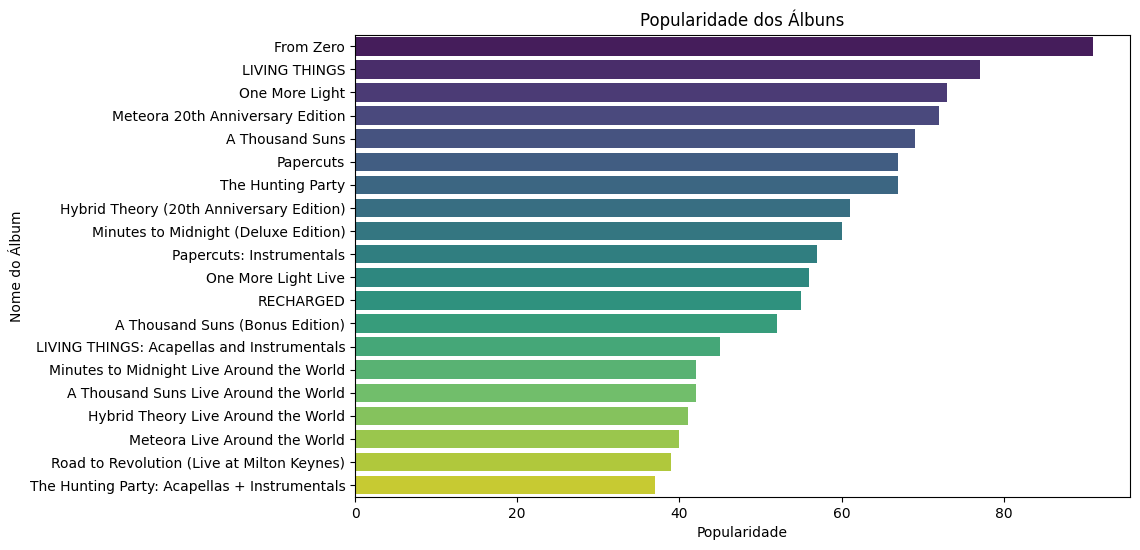

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

popularidade_sorted = lp_df.sort_values(by='Popularidade', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Popularidade', y='Nome Album', hue='Nome Album', data=popularidade_sorted, palette='viridis')

plt.title('Popularidade dos Álbuns')
plt.xlabel('Popularidade')
plt.ylabel('Nome do Álbum')
plt.show()


Relação entre as variáveis Total de Faixas e Popularidade

Este código cria um gráfico de barras onde cada álbum é representado no eixo X. Para cada álbum, há duas barras:

- Uma para Popularidade.
- Outra para Total de Faixas.

O eixo Y exibe os valores numéricos correspondentes. O gráfico é rotulado de forma clara, com os nomes dos álbuns no eixo X rotacionados para facilitar a leitura. Esse gráfico serve para fazer um comparativo entre duas métricas (Popularidade e Total de Faixas) para cada álbum.

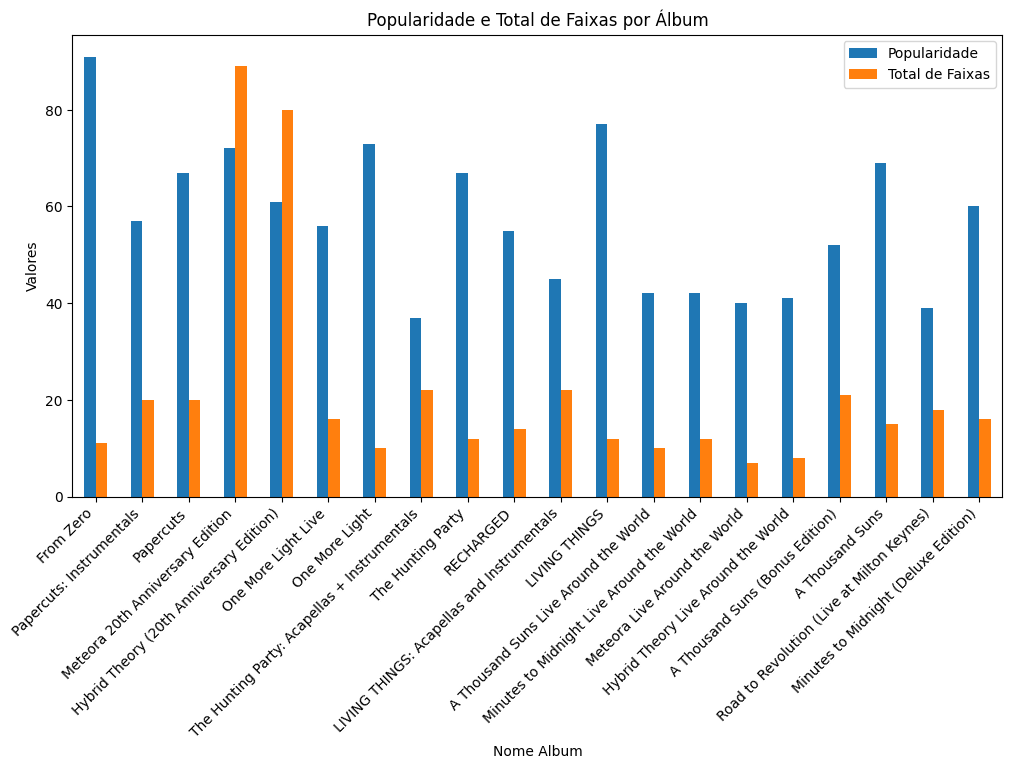

In [19]:
lp_df[['Nome Album', 'Popularidade', 'Total de Faixas']].set_index('Nome Album').plot(kind='bar', figsize=(12, 6))
plt.title('Popularidade e Total de Faixas por Álbum')
plt.ylabel('Valores')
plt.xticks(rotation=45, ha='right')
plt.show()

Datas de Lançamento

Este código cria um gráfico de barras que mostra a distribuição dos álbuns lançados ao longo dos anos. Cada barra representa um ano (no eixo X), e a altura da barra indica a quantidade de álbuns lançados naquele ano (no eixo Y).

É uma boa maneira de visualizar tendências temporais, como identificar anos em que houve um pico de lançamentos.

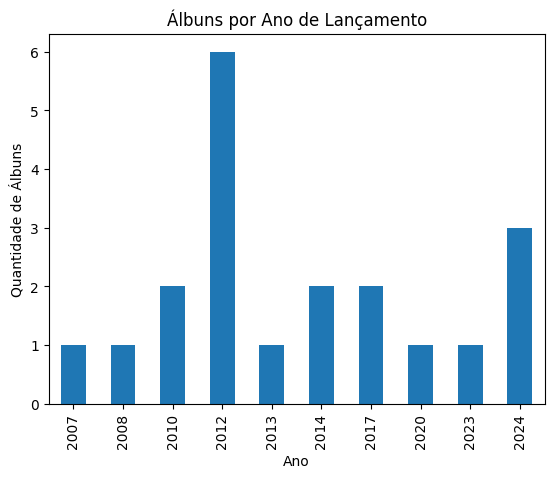

In [14]:
lp_df['Data de Lancamento'] = pd.to_datetime(lp_df['Data de Lancamento'])

lp_df['Data de Lancamento'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Álbuns por Ano de Lançamento')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Álbuns')
plt.show()

Popularidade por Nome do Álbum

Este código gera um boxplot horizontal que permite comparar a variação da popularidade entre diferentes álbuns. É uma visualização útil para identificar álbuns com distribuições de popularidade mais consistentes (caixas estreitas) ou outliers (pontos fora das caixas). A remoção da legenda mantém o gráfico mais limpo.

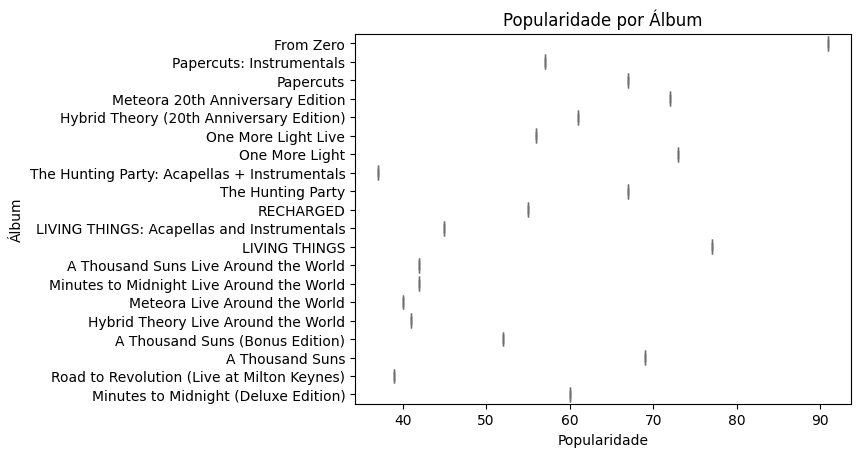

In [20]:
sns.boxplot(
    data=lp_df,
    y='Nome Album',
    x='Popularidade',
    hue='Nome Album',
    palette='pastel',
    dodge=False
)
plt.title('Popularidade por Álbum')
plt.xlabel('Popularidade')
plt.ylabel('Álbum')
plt.legend([], [], frameon=False)
plt.show()

Relação entre Total de Faixas e Popularidade

Este código cria um gráfico de dispersão para explorar a relação entre o número total de faixas em um álbum e sua popularidade. Ele pode ajudar a identificar padrões ou outliers na distribuição, como álbuns populares com poucas faixas ou álbuns com muitas faixas, mas baixa popularidade. 

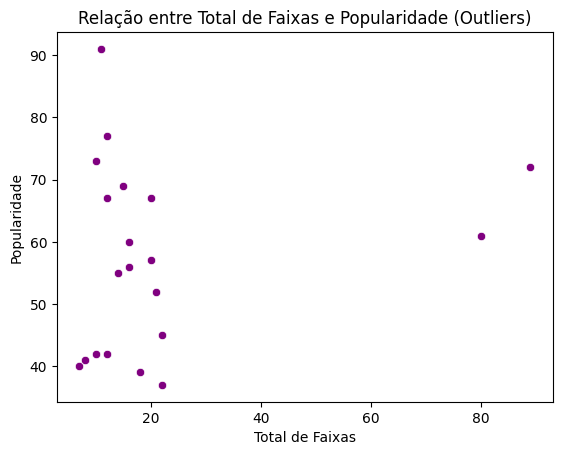

In [22]:
sns.scatterplot(data=lp_df, x='Total de Faixas', y='Popularidade', color='purple')
plt.title('Relação entre Total de Faixas e Popularidade (Outliers)')
plt.xlabel('Total de Faixas')
plt.ylabel('Popularidade')
plt.show()

Correlação entre Popularidade e Total de Faixas

Este código verifica se há uma relação linear entre Popularidade e Total de Faixas no DataFrame lp_df, exibindo o resultado como uma matriz de correlação. Essa abordagem é útil para entender o comportamento dos dados e orientar análises futuras.

In [23]:
correlacao = lp_df[['Popularidade', 'Total de Faixas']].corr()
print(correlacao)

                 Popularidade  Total de Faixas
Popularidade         1.000000         0.184185
Total de Faixas      0.184185         1.000000


visualização dos álbuns mais populares e menos populares com base na média e desvio padrão da popularidade

Esse trecho de código realiza a visualização dos álbuns mais populares e menos populares com base na média e desvio padrão da popularidade, em um gráfico de barras.

1. Cálculo da Média e Desvio Padrão:
O código calcula a média (media_popularidade) e o desvio padrão (desvio_padrao) da coluna Popularidade do DataFrame lp_df.
2. Identificação dos Álbuns:
Acima da média: Os álbuns com popularidade maior que a média + desvio padrão são armazenados na variável acima_media.
Abaixo da média: Os álbuns com popularidade menor que a média - desvio padrão são armazenados na variável abaixo_media.
3. Criação do Gráfico:
O gráfico é configurado com o tamanho (12, 6).
Barras verdes: Representam os álbuns com popularidade acima da média, e são desenhadas usando sns.barplot com a cor green.
Barras vermelhas: Representam os álbuns com popularidade abaixo da média, e são desenhadas usando sns.barplot com a cor red.
4. Ajustes de Visualização:
O gráfico recebe o título "Álbuns Mais Populares e Menos Populares".
Os rótulos dos eixos X e Y são configurados como Álbum e Popularidade, respectivamente.
Os nomes dos álbuns no eixo X são rotacionados em 45 graus para facilitar a leitura.
A legenda é adicionada para identificar as barras verdes (acima da média) e vermelhas (abaixo da média).
5. Exibição do Gráfico:
O gráfico é exibido com o layout ajustado para não cortar elementos.

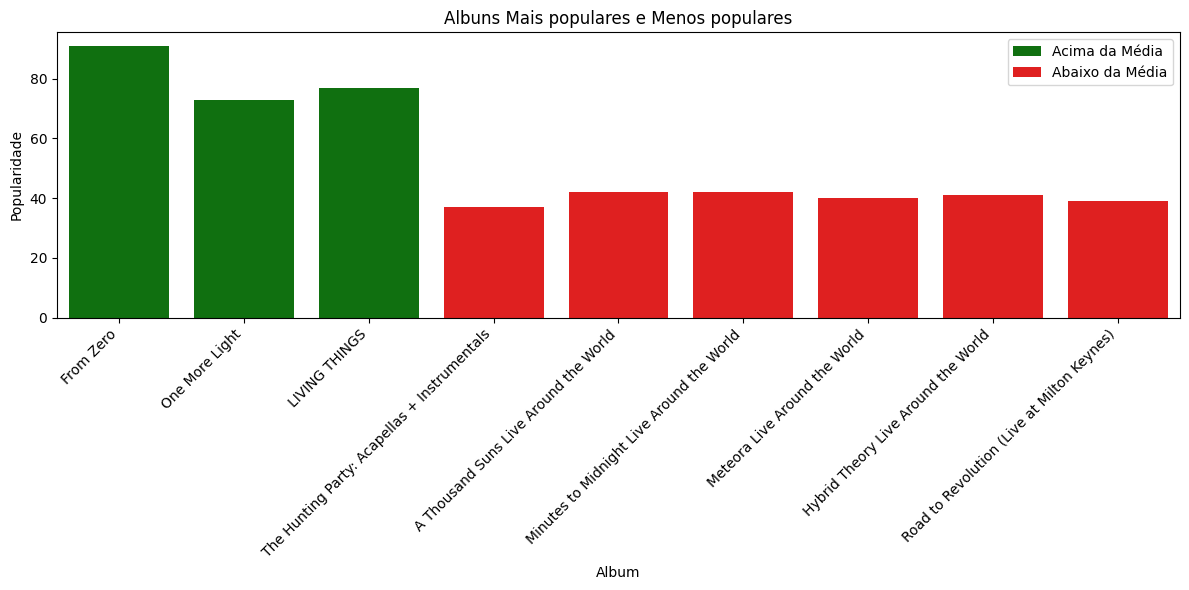

In [27]:
media_popularidade = lp_df['Popularidade'].mean()
desvio_padrao = lp_df['Popularidade'].std()

acima_media = lp_df[lp_df['Popularidade'] > media_popularidade + desvio_padrao]
abaixo_media = lp_df[lp_df['Popularidade'] < media_popularidade - desvio_padrao]

plt.figure(figsize=(12, 6))

sns.barplot(data=acima_media, x='Nome Album', y='Popularidade', color='green', label='Acima da Média')
sns.barplot(data=abaixo_media, x='Nome Album', y='Popularidade', color='red', label='Abaixo da Média')

plt.title('Albuns Mais populares e Menos populares')
plt.xlabel('Album')
plt.ylabel('Popularidade')
plt.xticks(rotation=45, ha='right')

plt.legend()

plt.tight_layout()
plt.show()